In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time


In [6]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Sir Qasim Project/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288065 entries, 0 to 288064
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   package_name  288065 non-null  object
 1   review        288065 non-null  object
 2   date          288065 non-null  object
 3   star          288065 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


In [7]:
df = df.head(50000)

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['star'] = labelencoder.fit_transform(df['star'])

<ipython-input-8-035ba32c5bb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['star'] = labelencoder.fit_transform(df['star'])


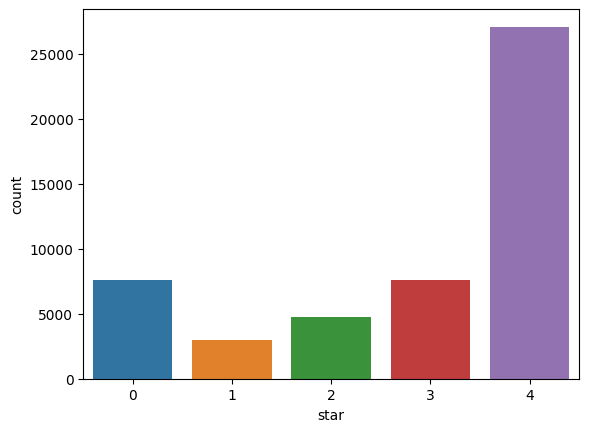

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='star', data=df)
plt.show()


In [10]:
# Import necessary libraries
from imblearn.under_sampling import RandomUnderSampler

# Separate the features and target variable
X = df.drop('star', axis=1)
y = df['star']

# Perform undersampling
undersample = RandomUnderSampler(sampling_strategy='not minority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

# Combine the undersampled X and y into a single dataframe
us_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the shape and class distribution of the new dataframe
print(us_df.shape)
print(us_df['star'].value_counts())

df = us_df
df.info()


0    2995
1    2995
2    2995
3    2995
4    2995
Name: star, dtype: int64
(14975, 4)
0    2995
1    2995
2    2995
3    2995
4    2995
Name: star, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  14975 non-null  object
 1   review        14975 non-null  object
 2   date          14975 non-null  object
 3   star          14975 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 468.1+ KB


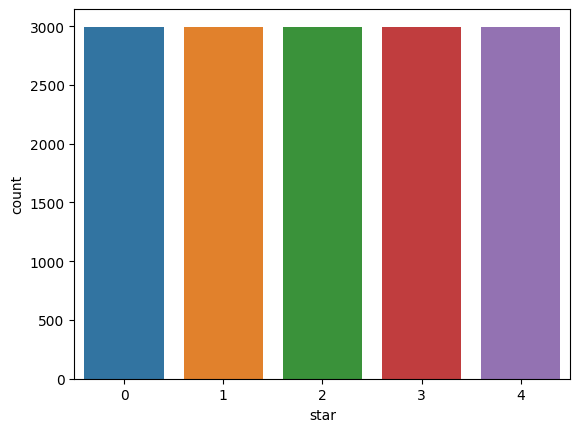

In [11]:
sns.countplot(x='star', data=df)
plt.show()


In [12]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('sentiwordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [13]:
# Create a new column to store the sentiment scores
df['swn_score'] = 0

# Iterate over each row
for index, row in df.iterrows():
    # Tokenize the review text
    tokens = word_tokenize(row['review'])
    print("itearation")
    # Initialize variables to store the total positive and negative scores
    pos_score = 0
    neg_score = 0

    # Calculate the sentiment scores for each token
    for token in tokens:
        synsets = swn.senti_synsets(token)
        for synset in synsets:
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()

    # Calculate the overall sentiment score by subtracting the negative score from the positive score
    sentiment_score = pos_score - neg_score

    # Update the sentiment score in the DataFrame
    df.at[index, 'swn_score'] = sentiment_score


Streaming output truncated to the last 5000 lines.
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
itearation
ite

In [14]:
df['swn_score']

0        10.625
1         0.000
2         1.125
3        -0.625
4         1.250
          ...  
14970    19.459
14971     2.250
14972     1.875
14973    20.584
14974     1.500
Name: swn_score, Length: 14975, dtype: float64

In [15]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.1 MB/s eta 0:00:00


In [16]:
# Define the hyperparameters
learning_rate = 2e-5
batch_size = 16
epochs = 10
num_labels = 5
attention_heads = 12
gradient_accumulation_steps = 16
hidden_size = 768
hidden_layers = 12
max_seq_length = 256
num_params = 110_000_000



In [17]:
import pandas as pd

# Assuming you have an updated DataFrame named 'df' with modifications

# Save the updated DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Sir Qasim Project/undersampled_df.csv', index=False)


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Sir Qasim Project/undersampled_df.csv')

In [19]:
df.head()

,package_name,review,date,star,swn_score
0,com.ringdroid,Just finished crop my music and nothing happen...,September 15 2015,0,10.625
1,org.openintents.filemanager,No material design No material design,December 14 2015,0,0.000
2,com.reicast.emulator,I can't get any game to work at all it just ex...,April 03 2017,0,1.125
3,com.nilhcem.hostseditor,U Couldn't hack coc,July 10 2015,0,-0.625
4,com.nilhcem.hostseditor,I dont many times i install,September 03 2015,0,1.250


In [20]:
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader


In [21]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the input data using the BERT tokenizer for the training set
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_input_ids = []
train_attention_masks = []
for _, row in train_df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    print("iteration")
    train_input_ids.append(encoded_dict['input_ids'])
    train_attention_masks.append(encoded_dict['attention_mask'])
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
train_labels = np.array(train_df['star'])
# Convert labels to a tensor for the training set
train_labels = torch.tensor(train_labels)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.



iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration

In [22]:
unique_labels = torch.unique(train_labels)
label_counts = torch.bincount(train_labels)
for label in unique_labels:
    count = label_counts[label]
    print(f"Label {label}: {count} occurrences")



Label 0: 2397 occurrences
Label 1: 2366 occurrences
Label 2: 2402 occurrences
Label 3: 2406 occurrences
Label 4: 2409 occurrences


In [23]:
with open("/content/drive/MyDrive/Sir Qasim Project/train_input_ids_us.pickle", "wb") as scores:
    pickle.dump(train_input_ids, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masks_us.pickle", "wb") as scores:
    pickle.dump(train_attention_masks, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/train_labels_us.pickle", "wb") as scores:
    pickle.dump(train_labels, scores)

In [24]:
with open("/content/drive/MyDrive/Sir Qasim Project/train_input_ids_us.pickle", "rb") as scores:
   train_input_ids = pickle.load(scores)

with open("/content/drive/MyDrive/Sir Qasim Project/train_attention_masks_us.pickle", "rb") as scores:
   train_attention_masks= pickle.load(scores)

with open("/content/drive/MyDrive/Sir Qasim Project/train_labels_us.pickle", "rb") as scores:
   train_labels = pickle.load(scores)

In [25]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(train_labels.shape)

torch.Size([11980, 256])
torch.Size([11980, 256])
torch.Size([11980])


In [26]:

# Create the training dataset and data loader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
print(train_dataset)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

In [27]:
# Tokenize the input data using the BERT tokenizer for testing set
from torch.utils.data import SequentialSampler


In [28]:
test_input_ids = []
test_attention_masks = []
for _, row in test_df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
test_labels = np.array(test_df['star'])
# Convert labels to a tensor for the training set
test_labels = torch.tensor(test_labels)

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


In [29]:

with open("/content/drive/MyDrive/Sir Qasim Project/test_input_ids_us.pickle", "wb") as scores:
    pickle.dump(test_input_ids, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masks_us.pickle", "wb") as scores:
    pickle.dump(test_attention_masks, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/test_labels_us.pickle", "wb") as scores:
    pickle.dump(test_labels, scores)

In [30]:
with open("/content/drive/MyDrive/Sir Qasim Project/test_input_ids_us.pickle", "rb") as scores:
   test_input_ids = pickle.load(scores)

with open("/content/drive/MyDrive/Sir Qasim Project/test_attention_masks_us.pickle", "rb") as scores:
   test_attention_masks = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/test_labels_us.pickle", "rb") as scores:
  test_labels = pickle.load(scores)

In [31]:
print(test_input_ids.shape)
print(test_attention_masks.shape)
print(test_labels.shape)

torch.Size([2995, 256])
torch.Size([2995, 256])
torch.Size([2995])


In [32]:
# Create the testing dataset and data loader
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)


In [33]:
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers.optimization import get_linear_schedule_with_warmup


In [34]:
val_input_ids = []
val_attention_masks = []
for _, row in df.iterrows():
    sentence = row['review']
    additional_column = str(row['swn_score'])  # Convert the additional column value to a string
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        additional_column,  # Include the additional column in the encoding process
                        add_special_tokens=True,
                        max_length=max_seq_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt'
                   )
    val_input_ids.append(encoded_dict['input_ids'])
    val_attention_masks.append(encoded_dict['attention_mask'])
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)

# Convert labels to a 1D numpy array for the training set
val_labels = np.array(df['star'])
# Convert labels to a tensor for the training set
val_labels = torch.tensor(val_labels)

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [35]:
with open("/content/drive/MyDrive/Sir Qasim Project/val_input_ids_us.pickle", "wb") as scores:
    pickle.dump(val_input_ids, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masks_us.pickle", "wb") as scores:
    pickle.dump(val_attention_masks, scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_labels_us.pickle", "wb") as scores:
    pickle.dump(val_labels, scores)

In [36]:
with open("/content/drive/MyDrive/Sir Qasim Project/val_input_ids_us.pickle", "rb") as scores:
   val_input_ids = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_attention_masks_us.pickle", "rb") as scores:
   val_attention_masks = pickle.load(scores)
with open("/content/drive/MyDrive/Sir Qasim Project/val_labels_us.pickle", "rb") as scores:
  val_labels = pickle.load(scores)

In [37]:
print(val_input_ids.shape)
print(val_attention_masks.shape)
print(val_labels.shape)

torch.Size([14975, 256])
torch.Size([14975, 256])
torch.Size([14975])


In [38]:
# Create the validation dataset and data loader
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_dataset)
val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size=batch_size)

In [39]:
import torch.nn as nn


In [40]:
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Move the model to the GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer and the learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*epochs)

# Set the number of epochs, the training and validation steps, and the loss function
epochs = 10
total_steps = len(train_dataloader) * epochs
train_steps = len(train_dataloader)
eval_steps = len(val_dataloader)
loss_fn = nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [41]:
x = list(range(1, epochs+1))
losses = []  # Track loss values
accuracies = []  # Track accuracy values
# Initialize the timer for training
start_time = time.time()
# Train the model
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        epoch_loss += loss.item()
        epoch_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        if (step + 1) % train_steps == 0:
            epoch_loss /= train_steps
            epoch_acc = epoch_correct / (train_steps * batch_size)
            print(f'Epoch [{epoch+1}/{epochs}], Step [{step+1}/{train_steps}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
            # Calculate epoch loss and accuracy
            epoch_loss /= train_steps
            epoch_acc = epoch_correct / (train_steps * batch_size)

            # Store the metric values
            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            epoch_loss = 0
            epoch_correct = 0

# Calculate the training time
training_time = time.time() - start_time

# Print the training time
print("Training Time: {:.4f} seconds".format(training_time))



Epoch [1/10], Step [749/749], Loss: 1.2454, Accuracy: 0.4524
Epoch [2/10], Step [749/749], Loss: 1.0257, Accuracy: 0.5687
Epoch [3/10], Step [749/749], Loss: 0.8386, Accuracy: 0.6643
Epoch [4/10], Step [749/749], Loss: 0.6498, Accuracy: 0.7553
Epoch [5/10], Step [749/749], Loss: 0.4815, Accuracy: 0.8280
Epoch [6/10], Step [749/749], Loss: 0.3682, Accuracy: 0.8738
Epoch [7/10], Step [749/749], Loss: 0.2914, Accuracy: 0.8994
Epoch [8/10], Step [749/749], Loss: 0.2294, Accuracy: 0.9217
Epoch [9/10], Step [749/749], Loss: 0.1904, Accuracy: 0.9326
Epoch [10/10], Step [749/749], Loss: 0.1579, Accuracy: 0.9458
Training Time: 5058.1059 seconds


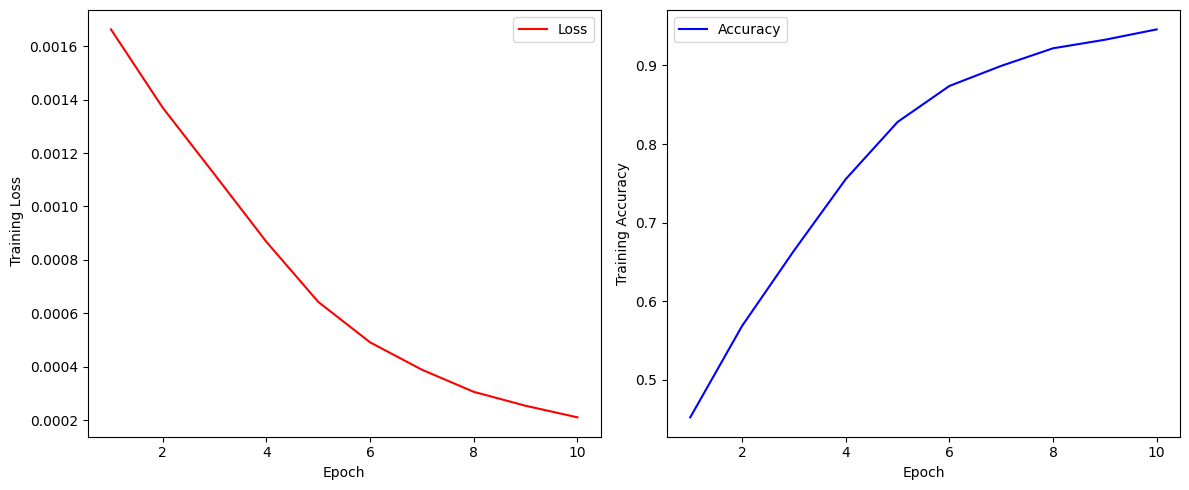

In [51]:
# Initialize the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Update the plots
ax[0].plot(x[:len(losses)], losses,  color="red", label="Loss")
ax[1].plot(x[:len(accuracies)], [acc.cpu().detach().item() for acc in accuracies],  color="blue", label="Accuracy")


# Set plot labels and titles
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel(" Training Loss")
# ax[0].set_title("Training Loss")
ax[0].legend()

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Training Accuracy")
# ax[1].set_title("Training Accuracy")
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


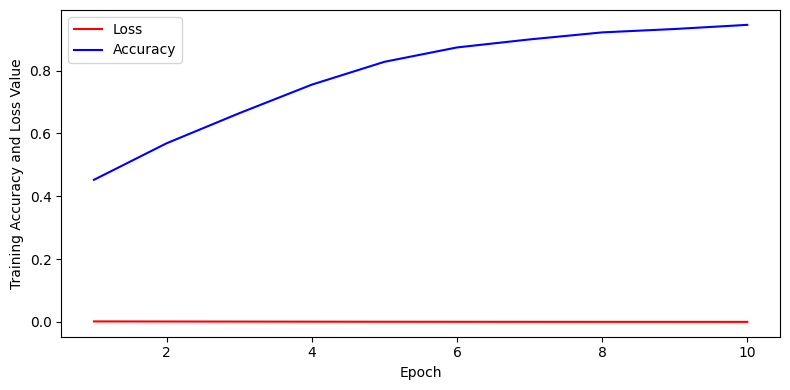

In [43]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'losses' and 'accuracies' containing the loss and accuracy values, respectively.

x = range(1, len(losses) + 1)  # Assuming 'x' represents the epochs

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Update the plots
ax.plot(x[:len(losses)], losses,  color="red", label="Loss")
ax.plot(x[:len(accuracies)], [acc.cpu().detach().item() for acc in accuracies],  color="blue", label="Accuracy")

# Set plot labels and titles
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Accuracy and Loss Value")
# ax.set_title("Training Loss and Accuracy")

# Add a legend to differentiate loss and accuracy lines
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Evaluate the model on the test dataset
model.eval()
predictions = []
true_labels = []
eval_loss = 0
eval_correct = 0


In [45]:
# import matplotlib.pyplot as plt

# # Initialize lists to store the accuracy and loss on each iteration
# iteration_accuracy = []
# iteration_loss = []

# # Evaluate the model on the test dataset
# model.eval()
# predictions = []
# true_labels = []

# # Initialize the timer for testing
# start_time = time.time()
# # Evaluation of Model
# with torch.no_grad():
#     for batch in val_dataloader:
#         input_ids = batch[0].to(device)
#         attention_mask = batch[1].to(device)
#         labels = batch[2].to(device)

#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         logits = outputs.logits

#         eval_correct = torch.sum(torch.argmax(logits, dim=1) == labels)
#         iteration_accuracy.append(eval_correct.item() / len(labels))
#         iteration_loss.append(loss.item())

#         predictions.extend(torch.argmax(logits, dim=1).tolist())
#         true_labels.extend(labels.tolist())

# # Calculate the testing time
# testing_time = time.time() - start_time


In [46]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and loss values
iteration_accuracy = []
iteration_loss = []

# Evaluate the model on the test dataset
model.eval()
predictions = []
true_labels = []
eval_loss = 0
eval_correct = 0
# Initialize the timer for testing
start_time = time.time()

# Evaluation of Model
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        eval_loss += loss.item()
        eval_correct += torch.sum(torch.argmax(logits, dim=1) == labels)

        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

        # Store accuracy and loss values
        iteration_accuracy.append(accuracy_score(true_labels, predictions))
        iteration_loss.append(eval_loss / (step + 1))

# Calculate the testing time
testing_time = time.time() - start_time

# Compute the accuracy, precision, recall, and F1 score
acc = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

# Print the testing time
print("Testing Time: {:.2f} seconds".format(testing_time))


Testing Time: 230.89 seconds


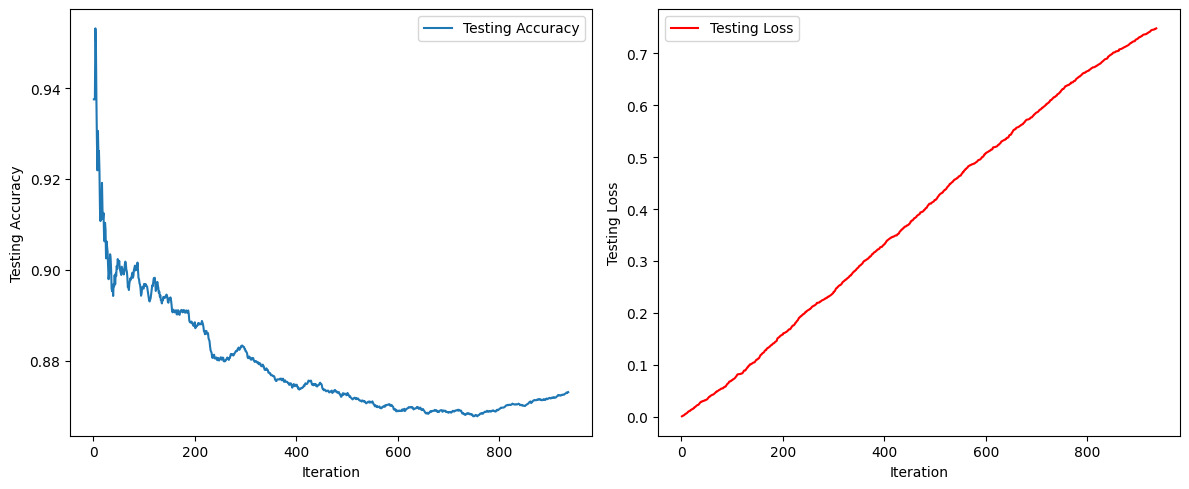

In [47]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'iteration_accuracy' and 'iteration_loss' containing the accuracy and loss values on each iteration, respectively.

iterations = range(1, len(iteration_accuracy) + 1)

# Initialize the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Update the accuracy subplot
line_accuracy, = ax[0].plot(iterations, iteration_accuracy, label='Testing Accuracy')
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Testing Accuracy")
# ax[0].set_title("Testing Accuracy on Each Iteration")

# Update the loss subplot
line_loss, = ax[1].plot(iterations, iteration_loss, color='red', label='Testing Loss')
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Testing Loss")
# ax[1].set_title("Testing Loss on Each Iteration")

# Add legend to both subplots
ax[0].legend(handles=[line_accuracy], loc='upper right')
ax[1].legend(handles=[line_loss], loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()


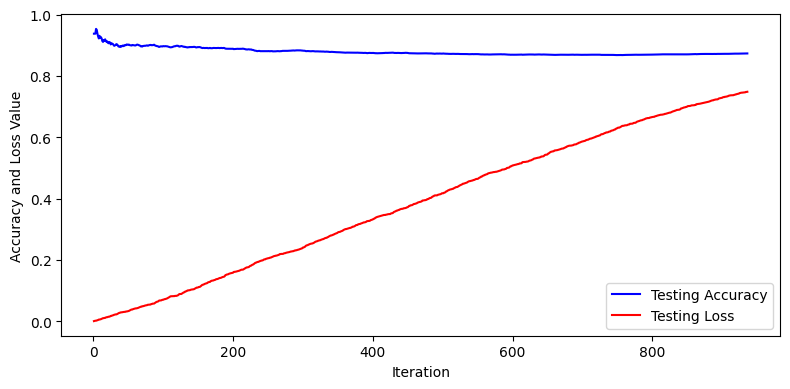

In [48]:
import matplotlib.pyplot as plt

# Assuming you have two lists 'iteration_accuracy' and 'iteration_loss' containing the accuracy and loss values on each iteration, respectively.

iterations = range(1, len(iteration_accuracy) + 1)

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Update the accuracy subplot
ax.plot(iterations, iteration_accuracy, label='Testing Accuracy', color='blue')
ax.set_xlabel("Iteration")
# ax.set_ylabel("Accuracy")
# ax.set_title("Accuracy and Loss on Each Iteration")

# Update the loss subplot
ax.plot(iterations, iteration_loss, label='Testing Loss', color='red')
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy and Loss Value")

# Add a legend to differentiate accuracy and loss lines
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
# Print the metrics
print(f'Test Loss: {eval_loss:.4f}, Test Accuracy: {acc:.4f}')
print(f'Test Accuracy: {acc:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

from sklearn.metrics import confusion_matrix

# y_pred and y_true are assumed to be numpy arrays or lists
confusion = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print(confusion)

Test Loss: 560.3301, Test Accuracy: 0.8731
Test Accuracy: 0.8731
Test Precision: 0.8735
Test Recall: 0.8731
Test F1 Score: 0.8732
[[2667  185   75   34   34]
 [ 161 2580  185   48   21]
 [  44  150 2569  183   49]
 [  23   50  140 2579  203]
 [  16   13   63  224 2679]]


              precision    recall  f1-score   support

      1 Star       0.92      0.89      0.90      2995
      2 Star       0.87      0.86      0.86      2995
      3 Star       0.85      0.86      0.85      2995
      4 Star       0.84      0.86      0.85      2995
      5 Star       0.90      0.89      0.90      2995

    accuracy                           0.87     14975
   macro avg       0.87      0.87      0.87     14975
weighted avg       0.87      0.87      0.87     14975

Confusion matrix:
 [[2667  185   75   34   34]
 [ 161 2580  185   48   21]
 [  44  150 2569  183   49]
 [  23   50  140 2579  203]
 [  16   13   63  224 2679]]


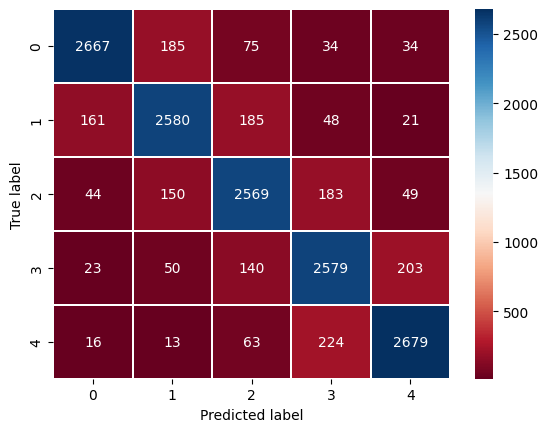

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Print classification report for ensemble model
target_names = ['1 Star', '2 Star', '3 Star','4 Star','5 Star']
print(classification_report(true_labels, predictions, target_names=target_names))

cm = confusion_matrix(true_labels, predictions)
print("Confusion matrix:\n", cm)
# corr, linewidths=.3, cmap="RdBu", annot=True, fmt=""
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', linewidths=.2, cmap='RdBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
